In [233]:
import pandas as pd

In [234]:
from sklearn.preprocessing import LabelEncoder

In [235]:
import seaborn as sns

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
from sklearn.preprocessing import MinMaxScaler

In [238]:
import matplotlib.pyplot as plt

In [239]:
from sklearn.neural_network import MLPClassifier

In [240]:
# Definujte cestu k CSV súboru s datasetom Iris
songs_dataset = "zadanie1_dataset.csv"

# Načítajte dataset s použitím Pandas
df = pd.read_csv(songs_dataset)

In [241]:
emotions = ['calm', 'energetic', 'happy', 'sad']

In [242]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'popularity', 'number_of_artists', 'explicit', 'name', 'url', 'genres',
       'filtered_genres', 'top_genre', 'emotion'],
      dtype='object')

In [243]:
columns_to_remove = ['name', 'url', 'genres', 'filtered_genres', 'duration_ms']
df_without_specified_columns = df.drop(columns=columns_to_remove)

In [244]:
# vymazanie outlierov pomocou setnutia hodnot(dole v zadani)
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['danceability'] >= 0.0) & (df_without_specified_columns['danceability'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['energy'] >= 0.0) & (df_without_specified_columns['energy'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['loudness'] >= -60) & (df_without_specified_columns['loudness'] <= 0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['speechiness'] >= 0.0) & (df_without_specified_columns['speechiness'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['acousticness'] >= 0.0) & (df_without_specified_columns['acousticness'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['instrumentalness'] >= 0.0) & (df_without_specified_columns['instrumentalness'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['liveness'] >= 0.0) & (df_without_specified_columns['liveness'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['liveness'] >= 0.0) & (df_without_specified_columns['liveness'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['popularity'] >= 0.0) & (df_without_specified_columns['popularity'] <= 100.0)]

In [245]:
# odstranenie null hodnot
df_without_specified_columns = df_without_specified_columns.dropna(how='any')

df_without_specified_columns.isnull().sum().sum()

0

In [246]:
df_without_specified_columns.dtypes


danceability         float64
energy               float64
loudness             float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
popularity           float64
number_of_artists    float64
explicit                bool
top_genre             object
emotion               object
dtype: object

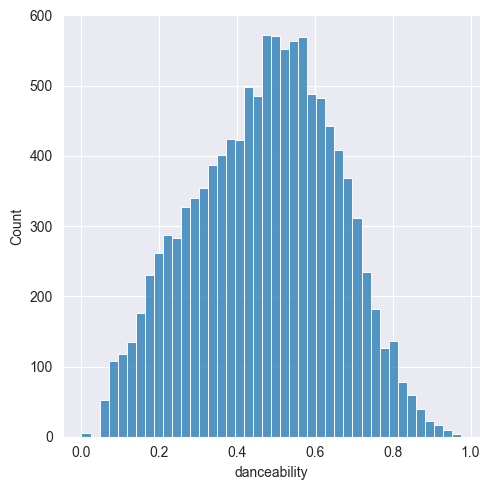

In [247]:
sns.displot(df_without_specified_columns['danceability'])

<Axes: ylabel='danceability'>

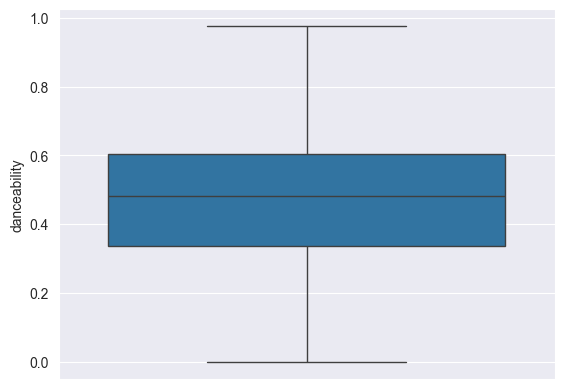

In [248]:
sns.boxplot(df_without_specified_columns['danceability'])

In [249]:
# zakodovanie stlpca EXPLICIT cez zmenu data type
df_without_specified_columns["explicit"] = df_without_specified_columns["explicit"].astype(int)

df_without_specified_columns["explicit"]

0        0
1        0
2        1
3        0
4        0
        ..
11955    0
11956    0
11957    0
11958    0
11959    0
Name: explicit, Length: 11537, dtype: int32

In [250]:
#label encodeing pre emotion spravit 
# Vytvorenie inštancie LabelEncoder
label_encoder = LabelEncoder()

# Fit a transform na stĺpec `top_genre`
df_without_specified_columns['emotion'] = label_encoder.fit_transform(df_without_specified_columns['emotion'])
df_without_specified_columns['emotion']

0        2
1        2
2        1
3        2
4        2
        ..
11955    3
11956    3
11957    3
11958    3
11959    2
Name: emotion, Length: 11537, dtype: int32

In [251]:
#One-Hot encodeing pre top-genre
temp = list(df_without_specified_columns["top_genre"].unique())

df_ohwd = pd.get_dummies(df_without_specified_columns, columns=['top_genre'], prefix='', prefix_sep='')

for i in temp:
    df_ohwd[i] = df_ohwd[i].astype(int)
    
df_ohwd


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,...,metalcore,opera,pop,punk,reggaeton,rock,rockabilly,ska,sleep,soul
0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,34.0,...,0,0,0,0,0,0,0,0,0,0
1,0.744,0.816,-3.933,0.0372,0.1440,0.000009,0.0902,0.748,120.062,52.0,...,0,0,0,0,0,0,0,0,0,0
2,0.721,0.768,-4.371,0.0685,0.2100,0.008430,0.2620,0.468,124.076,45.0,...,0,0,0,0,0,0,0,0,0,0
3,0.700,0.782,-4.631,0.0542,0.4490,0.000000,0.1430,0.680,124.969,46.0,...,0,0,0,0,0,0,0,0,0,0
4,0.764,0.587,-7.002,0.0298,0.0721,0.000006,0.0940,0.494,89.980,45.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,0.442,0.379,-12.711,0.0264,0.9610,0.000567,0.2840,0.659,79.948,0.0,...,0,0,0,0,0,0,0,0,0,0
11956,0.485,0.226,-10.503,0.0278,0.9820,0.000000,0.0960,0.508,139.543,0.0,...,0,0,0,0,0,0,0,0,0,0
11957,0.741,0.338,-8.488,0.0432,0.9300,0.000001,0.1640,0.804,133.504,0.0,...,0,0,0,0,0,0,0,0,0,0
11958,0.493,0.773,-5.875,0.0452,0.4560,0.000003,0.1070,0.478,140.998,0.0,...,0,0,0,0,0,0,0,0,0,0


In [252]:
'''
# Funkcia na odstránenie outlierov pomocou IQR pre všetky stĺpce
def remove_outliers_iqr(dataframe):
    # Vytvorenie prazdnej DataFrame pre výsledky
    df_cleaned = pd.DataFrame()
    temp.append('explicit')
    
    # Iterovanie cez všetky stĺpce v datasete
    for column in dataframe.drop(columns=temp).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned[column] = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)][column]
    
    return df_cleaned

# Zavolanie funkcie na odstránenie outlierov pre všetky stĺpce
df_cleaned = remove_outliers_iqr(df_ohwd)

print('before removing outliers:', len(df))
print('after removing outliers:',len(df_cleaned))
print('outliers:', len(df)-len(df_cleaned))

print("Dataset bez outlierov:")
print(df_cleaned)

df_cleaned
'''

'\n# Funkcia na odstránenie outlierov pomocou IQR pre všetky stĺpce\ndef remove_outliers_iqr(dataframe):\n    # Vytvorenie prazdnej DataFrame pre výsledky\n    df_cleaned = pd.DataFrame()\n    temp.append(\'explicit\')\n    \n    # Iterovanie cez všetky stĺpce v datasete\n    for column in dataframe.drop(columns=temp).columns:\n        Q1 = dataframe[column].quantile(0.25)\n        Q3 = dataframe[column].quantile(0.75)\n        IQR = Q3 - Q1\n        lower_bound = Q1 - 1.5 * IQR\n        upper_bound = Q3 + 1.5 * IQR\n        df_cleaned[column] = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)][column]\n    \n    return df_cleaned\n\n# Zavolanie funkcie na odstránenie outlierov pre všetky stĺpce\ndf_cleaned = remove_outliers_iqr(df_ohwd)\n\nprint(\'before removing outliers:\', len(df))\nprint(\'after removing outliers:\',len(df_cleaned))\nprint(\'outliers:\', len(df)-len(df_cleaned))\n\nprint("Dataset bez outlierov:")\nprint(df_cleaned)\n\ndf_cleaned\n'

In [253]:
df_ohwd.isnull().sum().sum()

0

In [254]:
# Rozdelenie dát do trénovacej (X_train, y_train), validačnej (X_val, y_val) a testovacej (X_test, y_test) množiny.
# 'X' sú vstupné stĺpce a 'Y' je výstupný stĺpec.
X = df_ohwd.drop(columns=['emotion']) #v x nesmie byt emotion,
y = df_ohwd['emotion']#  ale v y musi byt emotion, 

# Rozdelenie dát na trénovaciu, validačnú a testovaciu množinu 8:1:1
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [255]:
# Zobrazenie tvaru (počtu riadkov a stľpcov) trénovacej množiny
print("Tvar trénovacej množiny X_train:", X_train.shape)
print("Tvar trénovacej množiny y_train:", y_train.shape)

# Zobrazenie tvaru validačnej množiny
print("Tvar validačnej množiny X_val:", X_val.shape)
print("Tvar validačnej množiny y_val:", y_val.shape)

# Zobrazenie tvaru testovacej množiny
print("Tvar testovacej množiny X_test:", X_test.shape)
print("Tvar testovacej množiny y_test:", y_test.shape)

Tvar trénovacej množiny X_train: (9229, 44)
Tvar trénovacej množiny y_train: (9229,)
Tvar validačnej množiny X_val: (1154, 44)
Tvar validačnej množiny y_val: (1154,)
Tvar testovacej množiny X_test: (1154, 44)
Tvar testovacej množiny y_test: (1154,)


In [256]:
# Vytvorenie a nastavenie scaleru na trénovacie dáta
scaler = MinMaxScaler()
scaler.fit(X_train)

# Normalizácia trénovacích dát
X_train_normalized = scaler.transform(X_train)

# Použitie toho istého scaleru na validačné dáta a testovacie dáta
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

In [257]:
print(X_val_normalized)
print(X_test_normalized)

[[0.45846154 0.96597979 0.91402009 ... 0.         0.         0.        ]
 [0.24717949 0.19051917 0.59683693 ... 0.         0.         0.        ]
 [0.88205128 0.76185854 0.95539645 ... 0.         0.         0.        ]
 ...
 [0.31794872 0.82789777 0.86138064 ... 0.         0.         0.        ]
 [0.4174359  0.92595602 0.91500321 ... 0.         0.         0.        ]
 [0.41230769 0.02982372 0.48783928 ... 0.         0.         0.        ]]
[[0.54871795 0.9289578  0.92164993 ... 0.         0.         0.        ]
 [0.53128205 0.30358633 0.64274418 ... 0.         1.         0.        ]
 [0.50974359 0.69581932 0.780701   ... 0.         0.         0.        ]
 ...
 [0.58666667 0.83490193 0.87251549 ... 0.         0.         0.        ]
 [0.50974359 0.97698633 0.78172686 ... 0.         0.         0.        ]
 [0.74153846 0.87992868 0.91384911 ... 0.         0.         0.        ]]


In [258]:
# Vytvorenie a nastavenie jednoduchej neurónovej siete pre klasifikáciu
model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=100, random_state=42)

# Trénovanie modelu na trénovacích dátach
model.fit(X_train_normalized, y_train)

# Predikcia na validačných dátach
y_val_pred = model.predict(X_val_normalized)

C:\Users\boetf\Desktop\Vyska - skripta\ING\4.rocnik\zimny semester\SUNS\SUNS-zadanie-1\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [259]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train_normalized)
y_test_pred = model.predict(X_test_normalized)

accuracy_train = accuracy_score(y_train, y_train_pred) 
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Úspešnosť na trénovacej množine:", accuracy_train)
print("Úspešnosť na testovacej množine:", accuracy_test)


Úspešnosť na trénovacej množine: 0.8860114855347275
Úspešnosť na testovacej množine: 0.8821490467937608


In [260]:
from sklearn.metrics import confusion_matrix

confusion_train = confusion_matrix(y_train, y_train_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

print("Konfúzna matica na trénovacej množine:\n", confusion_train)
print("Konfúzna matica na testovacej množine:\n", confusion_test)


Konfúzna matica na trénovacej množine:
 [[2062    0    8   56]
 [   1 1960  184   27]
 [   7  204 2241  178]
 [  90   57  240 1914]]
Konfúzna matica na testovacej množine:
 [[264   0   1  12]
 [  0 237  17   1]
 [  0  36 283  25]
 [  8   7  29 234]]


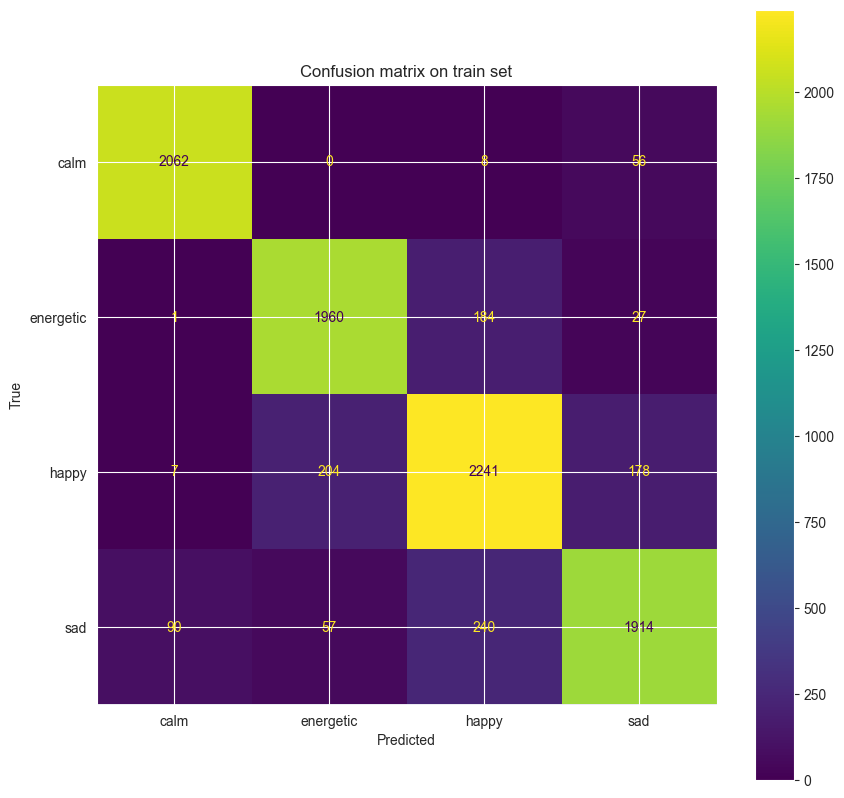

In [263]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=emotions)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
disp.ax_.set_title("Confusion matrix on train set")
disp.ax_.set(xlabel='Predicted', ylabel='True')
plt.show()